Promlem 3 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math

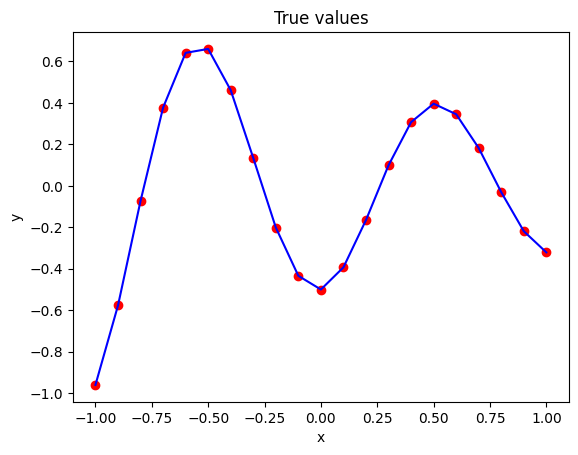

In [5]:
x_true =[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]         
y_true = [-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,-0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,0.396,0.345,0.182,-0.031,-0.219,-0.321]
plt.scatter(x_true, y_true, color='red', linestyle='-')
plt.plot(x_true, y_true, color='blue', linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('True values')
plt.show()

In [78]:
X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
f_X = np.array([-0.96, -0.577, -0.073, 0.377, 0.641, 0.66, 0.461, 0.134, -0.201, -0.434, -0.5, -0.393, -0.165, 0.099, 0.307, 0.396, 0.345, 0.182, -0.031, -0.219, -0.321])

def objective_function(X, f_X, params):
    x0, x1, x2, x3 = params
    predicted_values = x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X))
    error = predicted_values - f_X
    return np.mean(error**2)

def gradient_f(X, f_X, params):
    x0, x1, x2, x3 = params
    N = len(X)
    grad_x0 = 2 * np.sum(x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X)) - f_X) / N
    grad_x1 = 2 * np.sum((np.sin(X) + np.cos(X)) * (x1 + x2*np.sin(X) + x3*np.sin(2*X)) * (x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X)) - f_X)) / N
    grad_x2 = 2 * np.sum((np.sin(2*X) + np.cos(2*X)) * (x2 + x3*np.sin(X)) * (x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X)) - f_X)) / N
    grad_x3 = 2 * np.sum((np.sin(3*X) + np.cos(3*X)) * (x3) * (x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X)) - f_X)) / N
    return np.array([grad_x0, grad_x1, grad_x2, grad_x3])

def steepest_descent(i,X,initial_point, alpha, epsilon,iterations,cost):
    x0, x1, x2, x3 = initial_point
    gradient = gradient_f(X,f_X, [x0, x1, x2, x3])
    iterations.append(i)
    cost.append(objective_function(X,f_X, [x0, x1, x2, x3]))
    # print(i,x0,x1,x2,x3,alpha,objective_function(X,f_X, [x0, x1, x2, x3]),'----------',np.linalg.norm(gradient),'---',epsilon)
    while True:
        i +=1
        gradient = gradient_f(X,f_X, [x0, x1, x2, x3])
        if np.linalg.norm(gradient) < epsilon:
            break
        x0 -= alpha * gradient[0] 
        x1 -= alpha * gradient[1]
        x2 -= alpha * gradient[2]
        x3 -= alpha * gradient[3]
        # print(i,x0,x1,x2,x3,alpha,objective_function(X,f_X, [x0, x1, x2, x3]),'----------',np.linalg.norm(gradient),'---',epsilon)
        iterations.append(i)
        cost.append(objective_function(X,f_X, [x0, x1, x2, x3]))
        
    return x0, x1, x2, x3

i = 1
initial_point = [1, 1, 1, 1]
iterations = []
cost = []
alpha = 0.1
epsilon = 0.0245
min_point = steepest_descent(i,X,initial_point, alpha, epsilon,iterations,cost)
print("Minimum point:", min_point)
print("cost evaluated at minimum point:", objective_function(X,f_X,[min_point[0],min_point[1],min_point[2],min_point[3]]))

Minimum point: (0.1543890581565471, -0.24087712702493802, 0.06513152232901354, 0.1126494881104162)
cost evaluated at minimum point: 0.19700214103280114


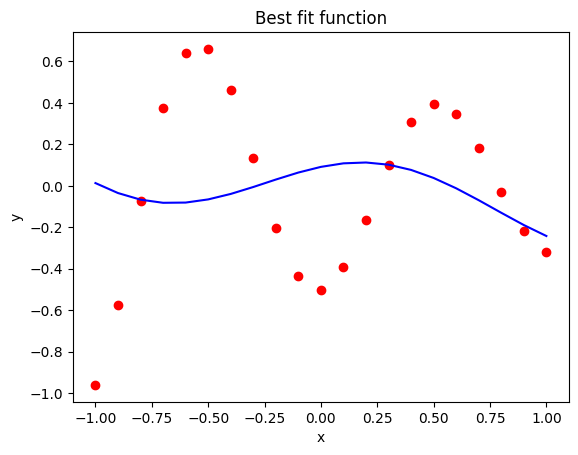

In [79]:
x_true =[-1,-0.9,-0.8,-0.7,-0.6,-0.5,-0.4,-0.3,-0.2,-0.1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]         
y_true = [-0.96,-0.577,-0.073,0.377,0.641,0.66,0.461,0.134,-0.201,-0.434,-0.5,-0.393,-0.165,0.099,0.307,0.396,0.345,0.182,-0.031,-0.219,-0.321]
plt.scatter(x_true, y_true, color='red', linestyle='-')

x0 = min_point[0]
x1 = min_point[1]
x2 = min_point[2]
x3 = min_point[3]

X = np.array([-1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
y = x0 + x1*(np.sin(X) + np.cos(X)) + x2*(np.sin(2*X) + np.cos(2*X)) + x3*(np.sin(3*X) + np.cos(3*X))
plt.plot(X, y, color='blue', linestyle='-')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best fit function')
plt.show()

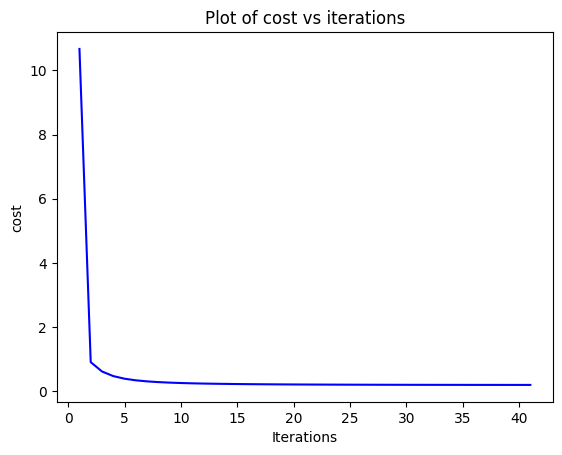

In [80]:
plt.plot(iterations, cost, color='blue', linestyle='-')

plt.xlabel('Iterations')
plt.ylabel('cost')
plt.title('Plot of cost vs iterations')
plt.show()